In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_returns(df_assets: pd.DataFrame, price_col: str = "close", date_col: str = "date"):
    """
    Analisa retornos diários e mensais de um ativo financeiro.
    
    Parâmetros:
    - df_assets: DataFrame com colunas de preço e data
    - price_col: nome da coluna de preço de fechamento (default = "close")
    - date_col: nome da coluna de data (default = "date")
    
    Retorna:
    - summary: DataFrame com estatísticas resumidas
    - df_assets: DataFrame original com colunas adicionais de retornos
    """

    df = df_assets.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df.sort_values(by=date_col, inplace=True)
    df.set_index(date_col, inplace=True)

    # Cálculo dos retornos
    df["daily_return"] = df[price_col].pct_change() * 100
    df.loc[df.index[0], "daily_return"] = 0

    # Retorno acumulado composto
    df["accumulated_return"] = (1 + df["daily_return"]/100).cumprod() - 1
    df["accumulated_return"] *= 100  # em porcentagem

    # Agrupar por mês
    df_monthly = df.resample("ME").last()

    # Cálculos principais
    mean_daily = df["daily_return"].mean()
    mean_monthly = df_monthly["daily_return"].mean()

    std_daily = df["daily_return"].std()
    std_monthly = df_monthly["daily_return"].std()

    total_return = df["accumulated_return"].iloc[-1]
    max_return = df["daily_return"].max()
    min_return = df["daily_return"].min()

    # Drawdown
    df["rolling_max"] = df["accumulated_return"].cummax()
    df["drawdown"] = df["accumulated_return"] - df["rolling_max"]
    max_drawdown = df["drawdown"].min()

    # Cria resumo
    summary = pd.DataFrame({
        "Média Retorno Diário (%)": [mean_daily],
        "Média Retorno Mensal (%)": [mean_monthly],
        "Volatilidade Diária (%)": [std_daily],
        "Volatilidade Mensal (%)": [std_monthly],
        "Retorno Total (%)": [total_return],
        "Maior Retorno Diário (%)": [max_return],
        "Pior Retorno Diário (%)": [min_return],
        "Maior Queda (Drawdown %)": [max_drawdown]
    }).round(2)

    print("📊 Estatísticas de Retorno:")
    print(summary.to_string(index=False))

    # Plotar gráfico
    plt.figure(figsize=(16,6))
    plt.plot(df.index, df["accumulated_return"], label="Retorno acumulado", color="blue")
    plt.fill_between(df.index, df["drawdown"], 0, color="red", alpha=0.2, label="Drawdown")
    plt.title("Retorno acumulado e Drawdown")
    plt.legend()
    plt.show()

    # return summary, df


In [72]:
import requests
import os
import pandas as pd


url = "http://127.0.0.1:8000"
end_point = "portfolio/asset/list"

full_path = f"{url}/{end_point}"

response = requests.get(full_path)

df_all_assets = pd.DataFrame(response.json())


df_all_assets[df_all_assets["symbol"]=="PETR4.SA"]

,id,symbol,category,name,start_date,end_date
268,309,PETR4.SA,Ação Preferencial,Unknown Name for PETR4.SA,2000-01-03T00:00:00,2025-10-28T00:00:00


In [73]:
import requests
import os
import pandas as pd

url = "http://127.0.0.1:8000"
end_point = "portfolio/asset/list"


end_point = "/portfolio/history-per-asset-id/{asset_id}"
asset_id = 309
full_path = f"{url}/{end_point.format(asset_id=asset_id)}"

response = requests.get(full_path)

df_assets = pd.DataFrame(response.json())
df_assets.head()

,id,date,open,high,low,close,volume,dividends,stock_splits,asset_id
0,1307932,2000-01-03T00:00:00,5.875,5.875,5.875,5.875,35389440000,0.0,0.0,309
1,1307933,2000-01-04T00:00:00,5.550,5.550,5.550,5.550,28861440000,0.0,0.0,309
2,1307934,2000-01-05T00:00:00,5.494,5.494,5.494,5.494,43033600000,0.0,0.0,309
3,1307935,2000-01-06T00:00:00,5.475,5.475,5.475,5.475,34055680000,0.0,0.0,309
4,1307936,2000-01-07T00:00:00,5.500,5.500,5.500,5.500,20912640000,0.0,0.0,309


In [ ]:
# df_assets["Return"] # mes atual / Mês anterior

df_assets["daily_return"] = df_assets["close"].pct_change() * 100
df_assets.loc[0, "daily_return"] = 0

# Matematicamente correto é multiplicar os retornos (porque são percentuais compostos)
    # Assim, você evita distorções ao longo de muitos dias.
df_assets["accumulated_return"] = (1 + df_assets["daily_return"]/100).cumprod() - 1
df_assets["accumulated_return"] *= 100  # volta pra porcentagem



📊 Estatísticas de Retorno:
 Média Retorno Diário (%)  Média Retorno Mensal (%)  Volatilidade Diária (%)  Volatilidade Mensal (%)  Retorno Total (%)  Maior Retorno Diário (%)  Pior Retorno Diário (%)  Maior Queda (Drawdown %)
                     0.06                      0.15                     2.62                     2.35             410.47                     22.22                    -29.7                    -822.3


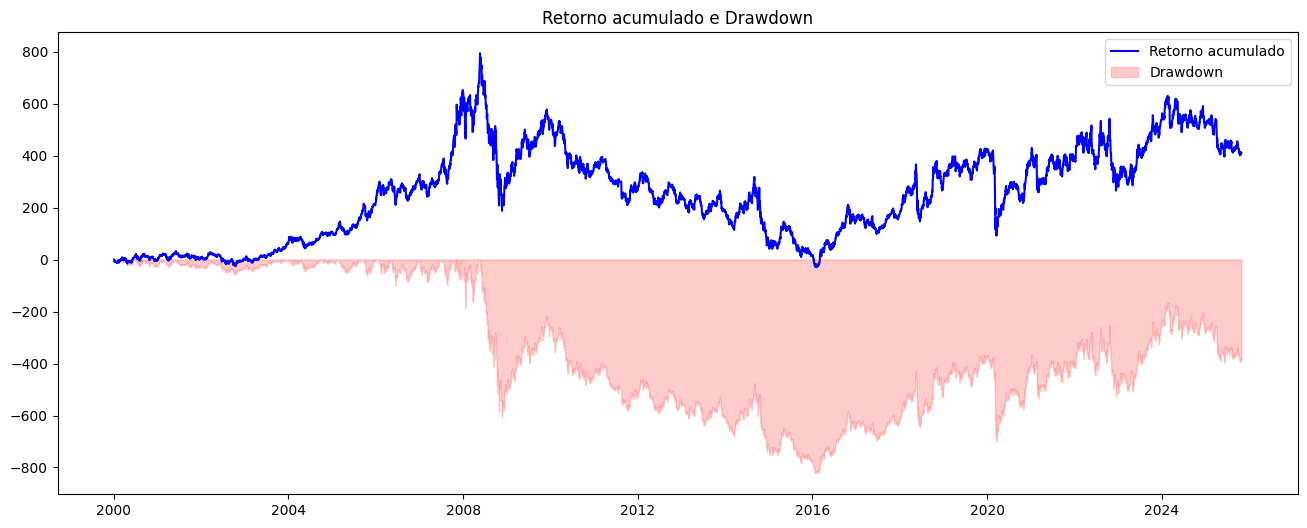

In [95]:
# df_assets
analyze_returns(df_assets)

# display(summary.round(2).to_dict("records"))

---

In [79]:
df_assets.head(400)

,id,date,open,high,low,close,volume,dividends,stock_splits,asset_id,daily_return,accumulated_return
0,1307932,2000-01-03T00:00:00,5.8750,5.87500,5.8750,5.87500,35389440000,0.0,0.0,309,0.000000,0.000000
1,1307933,2000-01-04T00:00:00,5.5500,5.55000,5.5500,5.55000,28861440000,0.0,0.0,309,-5.531912,-5.531912
2,1307934,2000-01-05T00:00:00,5.4940,5.49400,5.4940,5.49400,43033600000,0.0,0.0,309,-1.009013,-6.540925
3,1307935,2000-01-06T00:00:00,5.4750,5.47500,5.4750,5.47500,34055680000,0.0,0.0,309,-0.345833,-6.886758
4,1307936,2000-01-07T00:00:00,5.5000,5.50000,5.5000,5.50000,20912640000,0.0,0.0,309,0.456623,-6.430135
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1308327,2001-07-09T00:00:00,6.5250,6.52500,6.5250,6.52500,0,0.0,0.0,309,0.000000,21.638946
396,1308328,2001-07-10T00:00:00,6.6000,6.73750,6.5875,6.69500,38672000,0.0,0.0,309,2.605365,24.244311
397,1308329,2001-07-11T00:00:00,6.6250,6.81500,6.6125,6.81375,32553600,0.0,0.0,309,1.773706,26.018017
398,1308330,2001-07-12T00:00:00,6.8125,6.85000,6.7125,6.78125,19961600,0.0,0.0,309,-0.476974,25.541043


Em analise estatistica
- A media é o valor esperado para a ação
- O Desvio Padrão é representa o risco

In [ ]:
# df_assets
df_plot = df_assets.copy()#.iloc[-1000:].copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot.set_index("date", inplace=True)

df_monthly = df_plot.resample("ME").last().copy()

df_assets["daily_return"].mean()



np.float64(0.059738045498284556)

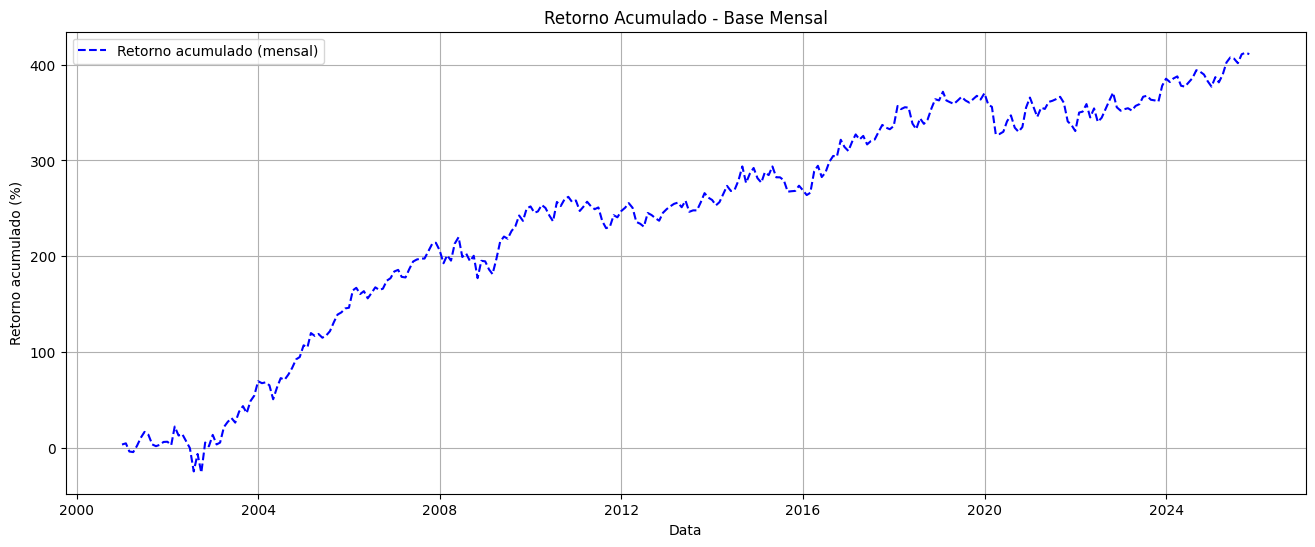

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Copiar e preparar dados
df_plot = df_assets.copy()#.iloc[-1000:].copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot.set_index("date", inplace=True)

# Agrupar por mês (pegando o último valor de cada mês)
df_monthly = df_plot.resample("ME").last()

# Plotar gráfico mensal
plt.figure(figsize=(16, 6))
plt.plot(df_monthly.index, df_monthly["accumulated_return"],
         label="Retorno acumulado (mensal)", color="blue", linestyle="--")

plt.title("Retorno Acumulado - Base Mensal")
plt.xlabel("Data")
plt.ylabel("Retorno acumulado (%)")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import yfinance as yf
import numpy as np

# Baixar dados históricos da ação
ticker = "ABCB4.SA"
df = yf.download(ticker, start="2023-01-01", end="2025-10-29")

# Calcular os retornos diários
df["Return"] = df["Close"].pct_change()

# Remover valores nulos
df.dropna(inplace=True)

# Calcular o Valor Esperado (média dos retornos)
expected_value = df["Return"].mean()

aporte = 10000

# Exibir resultado
print(f"Valor Esperado diário de retorno para {ticker}: {expected_value:.4%} -> R${expected_value*aporte:.2}")

# Interpretação
# - Se o valor esperado for positivo, indica que o ativo tende a subir no longo prazo.
# - Se for negativo, indica tendência de queda.
# - Você pode multiplicar esse valor pela posição financeira (ex: R$ 10.000 investidos) para estimar o retorno esperado diário.


C:\Users\guilh\AppData\Local\Temp\ipykernel_14996\60178407.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2023-01-01", end="2025-10-29")
[*********************100%***********************]  1 of 1 completed

Valor Esperado diário de retorno para ABCB4.SA: 0.0688% -> R$6.9


<Axes: xlabel='Date'>

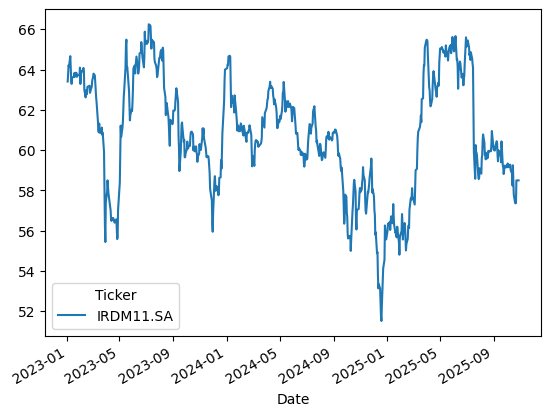

In [25]:
df["Close"].plot()